In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('../dados/balance-scale.csv')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [6]:
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())

In [7]:
df

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5
...,...,...,...,...,...
620,1,5,5,5,1
621,1,5,5,5,2
622,1,5,5,5,3
623,1,5,5,5,4


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


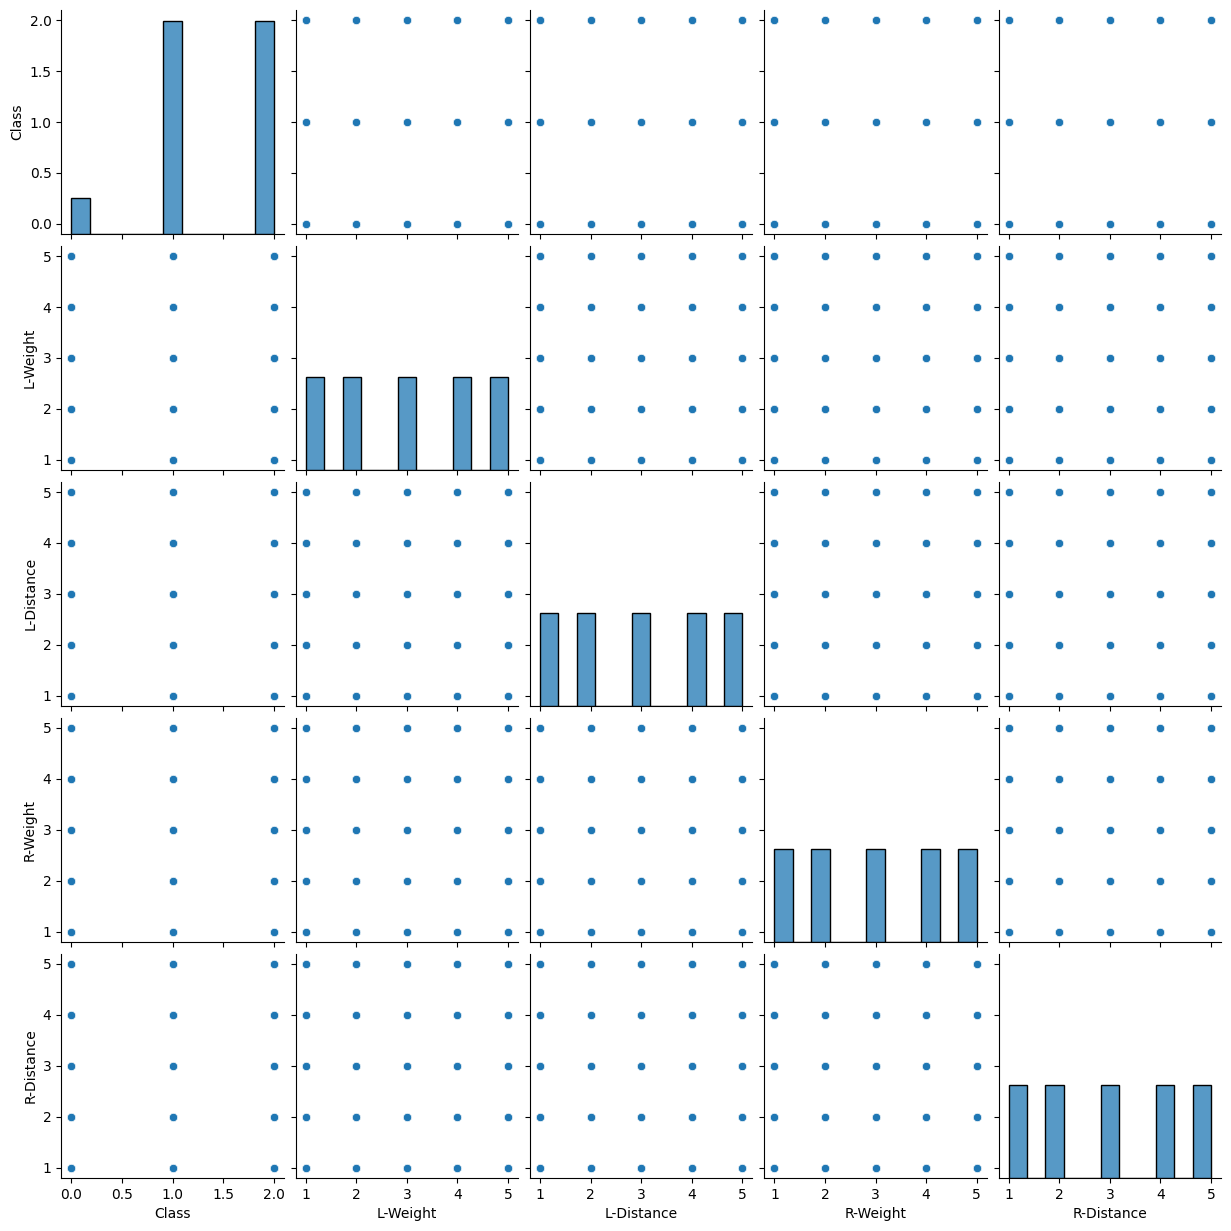

In [9]:
sns.pairplot(data=df)

<Axes: >

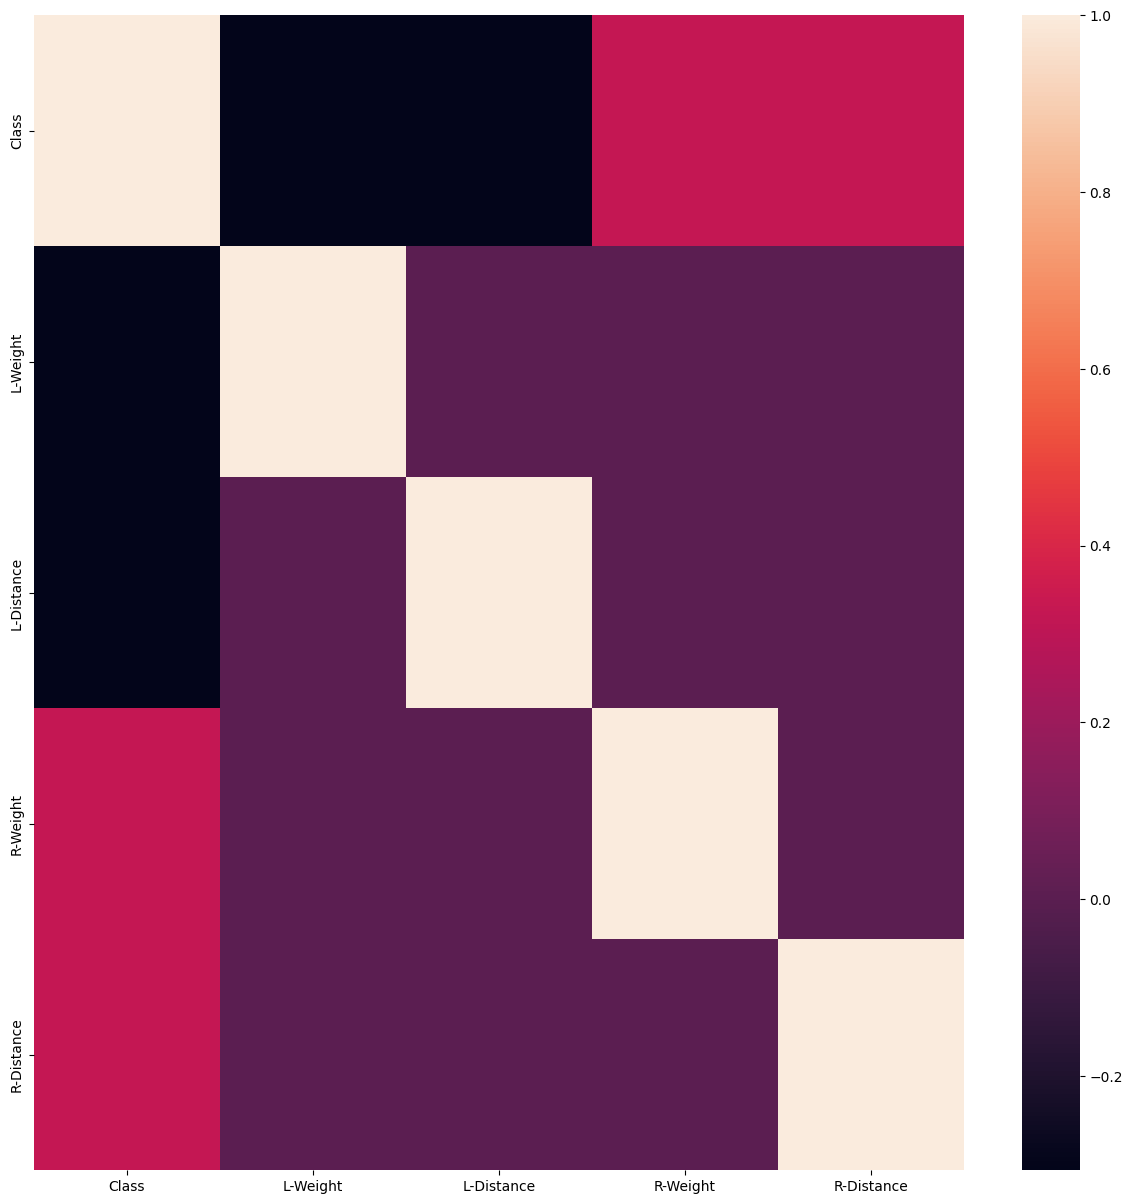

In [8]:
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [10]:
#Dividing X and y
y = df[['Class']]
X = df.drop(['Class'], axis = 1)

print(y.head())
print(X.head())

   Class
0      0
1      2
2      2
3      2
4      2
   L-Weight  L-Distance  R-Weight  R-Distance
0         1           1         1           1
1         1           1         1           2
2         1           1         1           3
3         1           1         1           4
4         1           1         1           5


In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [14]:
clf = ExtraTreesClassifier(n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  85.0


In [15]:
clf = XGBClassifier(learning_rate=0.5, n_jobs=-1, n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0


In [16]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


In [17]:
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  85.0


In [18]:
clf = SVC()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


In [19]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0
